#Anant Jain MCS20005_Assignment_1

# Question 1


1.Take the Lena image with input in size 64×64 and zoom the
image to 128×128 using bilinear interpolation

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def bilinear_interpolation(img, scale):
    height,width =img.shape
    m,n = int(height),int(width*scale)
    new_img=np.zeros((m,n))
    for i in range(height):
        for j in range(width):
            p = i
            q = 2*j
            new_img[p,q] = int(img[i,j])
    for i in range(height):
        for j in range(width-1):
            new_img[i,((2*j)+1)] = int( (int(img[i,j])+int(img[i,j+1]))//2)
    
    new_img = new_img.astype(np.uint8)
    
    m,n = int(height*scale),int(width*scale)
    final_img = np.zeros((m,n))
    for i in range(int(m//2)):
        for j in range(n):
            p = 2*i
            q = j
            final_img[p,q] = new_img[i,j]
   
    for i in range(int(m/2-1)):
        for j in range(n):
            final_img[((2*i)+1),j] = int( (int(new_img[i,j])+int(new_img[i+1,j]))//2)
            
    final_img = final_img.astype(np.uint8)
    
    return final_img
    

In [ ]:
img = cv2.imread('lenna_grey.JPG')
img = cv2.resize(img,(64,64))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bilinear_img = bilinear_interpolation(gray_img, 2.0)
print(gray_img.shape)

(64, 64)


In [ ]:
print(bilinear_img)

[[163 161 160 ... 142 169   0]
 [160 159 159 ... 114 109   0]
 [157 157 158 ...  87  49   0]
 ...
 [ 51  54  58 ...  64  73   0]
 [ 48  50  52 ...  73  93   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
print(bilinear_img.shape)

(128, 128)


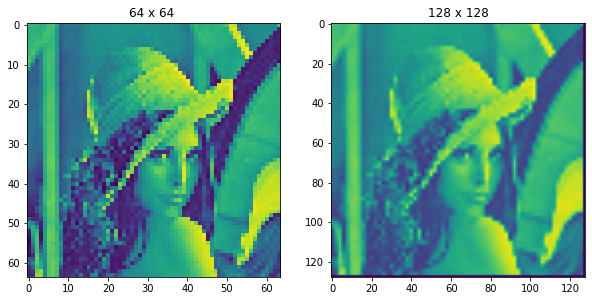

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('64 x 64 ')
ax1.imshow(gray_img)
ax2.set_title('128 x 128')
ax2.imshow(bilinear_img)

# Question 2

2.Take the grayscale Lena image. Image size should be larger than 256×256.
Compute the connected components over 16×16 non-overlapping blocks using
V= {150-200} and 4, 8 adjacencies.

In [ ]:
def find_connected_comp(img,adj,vx,vy):
    new_img=np.zeros((16,16)) 
    m,n = img.shape
    for i in range(1,m-1):
        for j in range(1,n-1):
            if adj==4 and (vx<=img[i+1,j]<=vy) and (vx<=img[i-1,j]<=vy) and (vx<=img[i,j+1]<=vy) and (vx<=img[i,j-1]<=vy):
                new_img[i,j]=img[i,j]
            if adj==8 and (vx<=img[i+1,j]<=vy) and (vx<=img[i-1,j]<=vy) and (vx<=img[i,j+1]<=vy) and (vx<=img[i,j-1]<=vy) and (vx<=img[i+1,j-1]<=vy) and (vx<=img[i-1,j+1]<=vy) and (vx<=img[i+1,j+1]<=vy) and (vx<=img[i-1,j-1]<=vy):
                new_img[i,j]=img[i,j]
    return new_img

In [ ]:
img=cv2.imread('lenna_grey.JPG')
original = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img.shape)

(772, 769)


In [ ]:
print("Enter adjacency you need 4 or 8:")
adj = int(input())
print("Enter start range of V:")
vx = int(input())
print("Enter end range of V:")
vy = int(input())

Enter adjacency you need 4 or 8:
8
Enter start range of V:
150
Enter end range of V:
200


In [ ]:
m,n = img.shape
for i in range(m//16):
    for j in range(n//16):
        img[i*16:i*16+16,j*16:j*16+16]=find_connected_comp(img[i*16:i*16+16,j*16:j*16+16],adj,vx,vy)

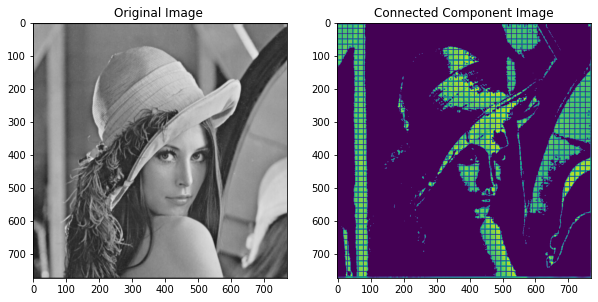

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Original Image ')
ax1.imshow(original)
ax2.set_title('Connected Component Image')
ax2.imshow(img)